<HR>

#### Imports

<HR>

In [40]:
#importing packages
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [41]:
df = pd.read_csv('creditcard.csv')

In [42]:
print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This data frame has 284807 rows and 31 columns.


In [43]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,...,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.62,0
1,0.0,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,...,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.69,0
2,1.0,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,...,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.66,0
3,1.0,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,...,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.50,0
4,2.0,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,...,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.99,0


##### Numerical Summary

In [44]:
pd.set_option('precision', 3)
df.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,284807.000,284807.000
mean,94813.860,88.350
std,47488.146,250.120
min,0.000,0.000
25%,54201.500,5.600
50%,84692.000,22.000
75%,139320.500,77.165
max,172792.000,25691.160


<HR>
    
#### Frequency Distribution for Time & Amount

<HR>

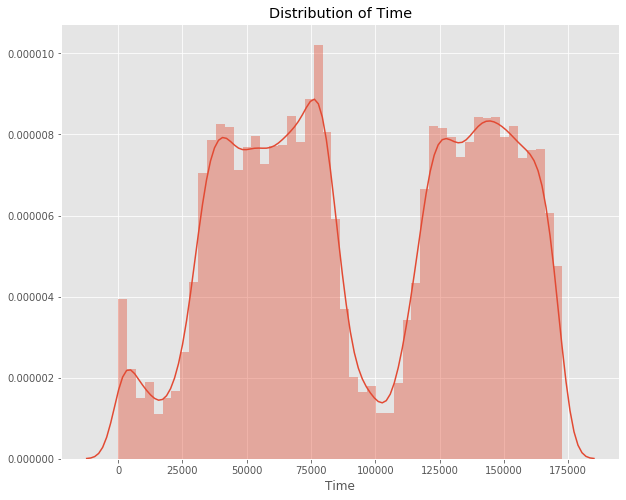

In [45]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Time')
sns.distplot(df.Time)

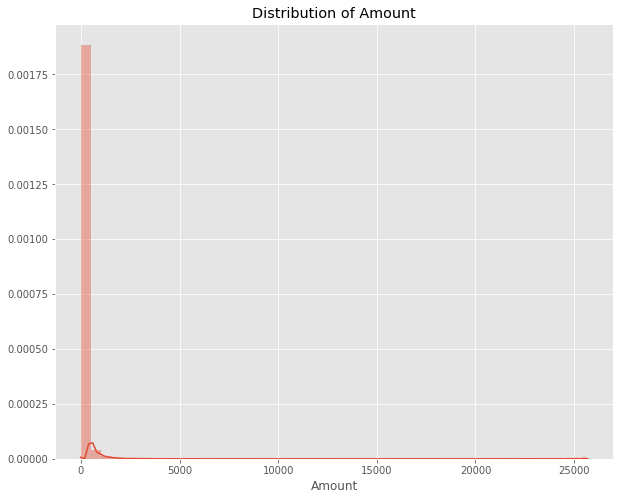

In [46]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Amount')
sns.distplot(df['Amount'])

<HR>

#### Class Imbalance

<HR>
    

In [49]:
 
ct = df.Class.value_counts()
normal = ct[0]
fraud = ct[1]
perc_normal = (normal/(normal+fraud))*100
perc_fraud = (fraud/(normal+fraud))*100


print('There were a total of {} non-fraud transactions ({:.3f}%) and {} fraud transactions ({:.3f}%).'.format(normal, perc_normal, fraud, perc_fraud))

There were a total of 284315 non-fraud transactions (99.827%) and 492 fraud transactions (0.173%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

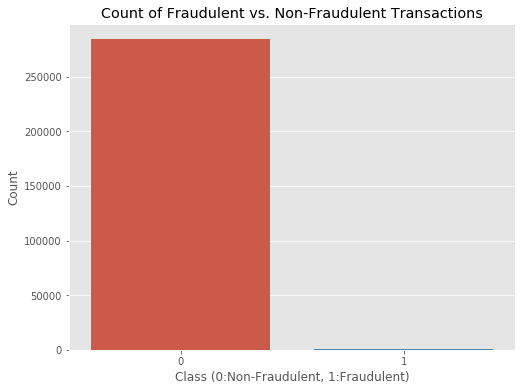

In [50]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [51]:
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000,1.174e-01,-1.059e-02,-4.196e-01,-1.053e-01,1.731e-01,-6.302e-02,8.471e-02,-3.695e-02,-8.660e-03,...,4.474e-02,1.441e-01,5.114e-02,-1.618e-02,-2.331e-01,-4.141e-02,-5.135e-03,-9.413e-03,-1.060e-02,-1.232e-02
V1,0.117,1.000e+00,4.697e-17,-1.424e-15,1.755e-17,6.391e-17,2.398e-16,1.992e-15,-9.491e-17,2.170e-16,...,-1.755e-16,7.477e-17,9.809e-16,7.354e-17,-9.805e-16,-8.622e-17,3.208e-17,9.821e-16,-2.277e-01,-1.013e-01
V2,-0.011,4.697e-17,1.000e+00,2.512e-16,-1.126e-16,-2.040e-16,5.025e-16,3.966e-16,-4.414e-17,-5.729e-17,...,8.444e-17,2.501e-16,1.060e-16,-8.142e-18,-4.262e-17,2.602e-16,-4.478e-16,-3.676e-16,-5.314e-01,9.129e-02
V3,-0.420,-1.424e-15,2.512e-16,1.000e+00,-3.417e-16,-1.437e-15,1.432e-15,2.169e-15,3.433e-16,-4.234e-16,...,-2.972e-17,4.648e-16,2.115e-17,-9.352e-17,4.771e-16,6.522e-16,6.240e-16,7.727e-16,-2.109e-01,-1.930e-01
V4,-0.105,1.755e-17,-1.126e-16,-3.417e-16,1.000e+00,-1.941e-15,-2.713e-16,1.556e-16,5.196e-16,3.860e-16,...,-9.977e-17,2.100e-16,6.003e-17,2.230e-16,5.395e-16,-6.180e-16,-6.403e-17,-5.864e-17,9.873e-02,1.334e-01
V5,0.173,6.391e-17,-2.040e-16,-1.437e-15,-1.941e-15,1.000e+00,7.926e-16,-4.210e-16,7.589e-16,4.205e-16,...,-1.369e-16,5.060e-16,1.638e-16,-9.286e-16,5.625e-16,9.145e-16,4.466e-16,-3.299e-16,-3.864e-01,-9.497e-02
V6,-0.063,2.398e-16,5.025e-16,1.432e-15,-2.713e-16,7.926e-16,1.000e+00,1.429e-16,-1.707e-16,1.114e-16,...,-1.576e-16,-3.363e-16,-7.232e-17,-1.262e-15,1.082e-15,-2.378e-16,-2.624e-16,4.813e-16,2.160e-01,-4.364e-02
V7,0.085,1.992e-15,3.966e-16,2.169e-15,1.556e-16,-4.210e-16,1.429e-16,1.000e+00,-8.692e-17,7.933e-16,...,1.939e-16,-1.058e-15,2.328e-16,-2.590e-17,1.174e-15,-7.335e-16,-5.887e-16,-6.837e-17,3.973e-01,-1.873e-01
V8,-0.037,-9.491e-17,-4.414e-17,3.433e-16,5.196e-16,7.589e-16,-1.707e-16,-8.692e-17,1.000e+00,2.901e-16,...,-2.412e-16,5.476e-16,3.897e-16,-1.803e-16,-1.391e-16,-1.210e-16,1.734e-16,-4.484e-16,-1.031e-01,1.988e-02
V9,-0.009,2.170e-16,-5.729e-17,-4.234e-16,3.860e-16,4.205e-16,1.114e-16,7.933e-16,2.901e-16,1.000e+00,...,4.578e-17,2.872e-17,5.929e-16,-2.346e-16,1.100e-15,-1.389e-15,-2.287e-16,9.147e-16,-4.425e-02,-9.773e-02


Text(0.5, 1, 'Heatmap of Correlation')

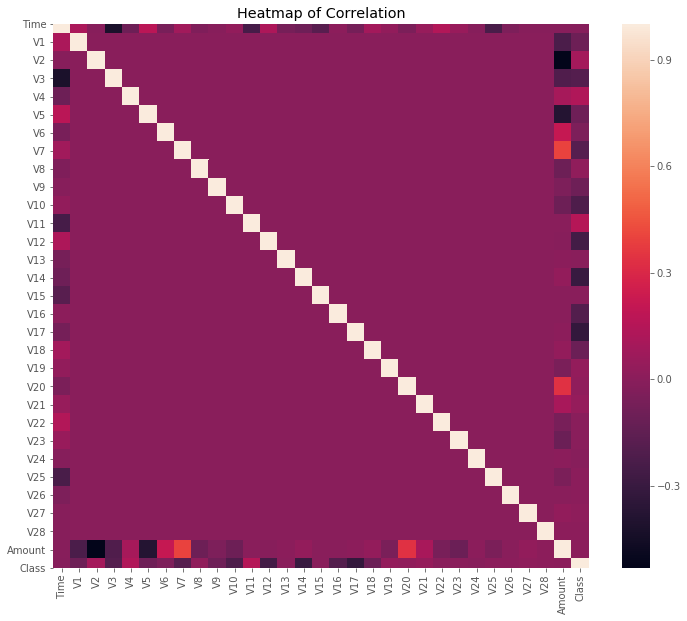

In [52]:
#heatmap
corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [53]:
#skewness
skew_ = df.skew()
skew_

Time      -0.036
V1        -3.281
V2        -4.625
V3        -2.240
V4         0.676
V5        -2.426
V6         1.827
V7         2.554
V8        -8.522
V9         0.555
V10        1.187
V11        0.357
V12       -2.278
V13        0.065
V14       -1.995
V15       -0.308
V16       -1.101
V17       -3.845
V18       -0.260
V19        0.109
V20       -2.037
V21        3.593
V22       -0.213
V23       -5.875
V24       -0.552
V25       -0.416
V26        0.577
V27       -1.170
V28       11.192
Amount    16.978
Class     23.998
dtype: float64

<HR>
    
#### Scaling Amount and Time

<hr>

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()
#scaling time
scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

In [55]:
#scaling the amount column
scaled_amount = scaler2.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [56]:
#concatenating newly created columns w original df
df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
35704,38227.0,0.959,-0.589,-0.771,-0.917,-0.246,-1.127,0.619,-0.314,0.556,...,-0.400,0.050,0.869,-0.470,-0.034,0.026,191.76,0,0.413,-1.192
233351,147534.0,2.058,0.040,-2.210,0.189,0.698,-0.529,0.089,-0.102,0.547,...,-0.161,-1.256,0.316,-0.046,-0.012,-0.051,14.97,0,-0.293,1.110
171865,120852.0,-0.016,0.963,-0.353,-0.279,1.562,0.314,0.785,0.064,-0.726,...,-0.082,-0.428,-0.674,0.309,0.147,0.196,1.98,0,-0.345,0.548
228201,145399.0,-2.218,-0.194,-0.049,-0.447,1.159,-0.786,1.159,0.150,-0.580,...,0.199,0.476,1.185,-0.255,-0.151,-0.113,135.58,0,0.189,1.065
73619,55209.0,1.090,-1.112,-0.798,-0.474,1.152,3.904,-1.135,0.924,-0.599,...,-0.208,0.991,0.637,-0.222,0.055,0.051,144.00,0,0.222,-0.834


In [57]:
#dropping old amount and time columns
df.drop(['Amount', 'Time'], axis=1, inplace=True)

<hr>

#### Splitting Data into Train and Test

<HR>

In [58]:
#manual train test split using numpy's random.rand
mask = np.random.rand(len(df)) < 0.9
train = df[mask]
test = df[~mask]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

Train Shape: (256385, 31)
Test Shape: (28422, 31)


In [59]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

**Creating a subsample data set with balanced class distributions**

In [60]:
#how many random samples from normal transactions do we need?
no_of_frauds = train.Class.value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))

There are 451 fraudulent transactions in the train data.


In [61]:
#randomly selecting 442 random non-fraudulent transactions
non_fraud = train[train['Class'] == 0]
fraud = train[train['Class'] == 1]

In [62]:
normal_sample = non_fraud.sample(no_of_frauds)
normal_sample.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
238037,-0.484,1.308,-2.188,-0.712,1.541,-0.786,1.045,0.243,-0.588,-0.464,...,0.553,-0.099,0.067,-0.192,0.553,0.295,0.162,0,-0.277,1.403
22372,-1.898,1.507,0.815,-0.093,-0.573,-0.872,0.067,0.657,-0.391,0.367,...,-0.433,0.347,0.511,-0.059,0.033,0.033,-0.183,0,-0.305,-1.293
174054,-1.887,0.743,0.029,-0.246,-1.276,1.251,0.010,0.537,1.779,-0.337,...,0.159,0.151,0.028,-0.975,-0.599,-1.108,0.040,0,0.316,0.744
198452,1.837,-0.088,-2.269,1.007,0.989,-0.378,0.775,-0.253,-0.361,0.485,...,0.376,-0.138,0.217,0.455,-0.516,-0.062,-0.052,0,0.128,0.999
223440,1.909,-1.401,-0.573,-0.946,-1.118,-0.009,-1.132,0.112,-0.125,0.880,...,1.213,0.077,0.741,-0.279,-0.127,-0.011,-0.030,0,0.124,1.244


In [63]:
#concatenating both into a subsample data set with equal class distribution
selected.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)

In [64]:
balanced_df = pd.concat([normal_sample, fraud])
len(balanced_df)

902

In [65]:
#shuffling our data set
balanced_df = balanced_df.sample(frac=1).reset_index(drop=True)
balanced_df.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-3.822,5.667,-9.245,8.246,-4.368,-3.451,-8.427,2.306,-5.338,-12.011,...,0.083,-0.062,0.390,0.330,0.098,1.870,1.001,1,-0.050,-0.021
1,-3.244,1.606,-0.422,-0.313,-1.704,-0.457,-0.841,1.470,2.223,-0.345,...,0.600,-0.299,-0.083,-0.187,0.544,0.010,-0.027,0,-0.073,0.084
2,-1.271,2.463,-2.851,2.324,-1.372,-0.948,-3.065,1.167,-2.269,-4.881,...,0.082,-0.221,-0.524,0.224,0.756,0.633,0.250,1,-0.353,-0.796
3,-0.464,0.220,1.012,-1.174,0.508,-0.089,-0.014,-0.214,-1.406,0.580,...,-0.303,-0.294,-0.907,-0.382,-0.435,-0.235,-0.096,0,-0.313,-1.217
4,0.286,1.399,-1.683,3.864,-1.185,-0.342,-2.539,0.768,-1.548,-2.660,...,-0.244,-0.194,-0.172,0.742,0.128,0.570,0.291,1,-0.323,-0.606
5,-0.961,1.159,1.536,-0.628,0.148,-0.823,0.921,-0.250,-0.126,0.435,...,-0.301,0.090,0.511,-0.568,-0.186,0.003,0.060,0,-0.346,-0.372
6,1.004,0.204,0.856,2.837,-0.572,-0.443,0.101,-0.041,-0.265,0.528,...,-0.555,0.009,0.678,0.398,-0.116,-0.016,0.036,0,-0.053,-0.771
7,1.612,-1.049,-0.574,0.483,-0.479,0.462,-0.505,0.027,1.103,-0.121,...,0.014,0.055,0.086,-0.454,0.145,-0.030,0.006,0,0.544,0.859
8,-1.739,-1.305,0.314,0.054,-0.059,0.071,0.695,-0.313,-0.649,0.518,...,-0.632,-0.421,-0.401,-0.002,-0.495,0.032,0.066,1,0.926,-0.568
9,-1.370,1.626,0.660,1.257,-0.771,0.216,-0.115,1.129,-0.594,-0.074,...,0.310,0.001,0.208,-0.075,-0.240,0.294,0.120,0,-0.184,-0.333


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

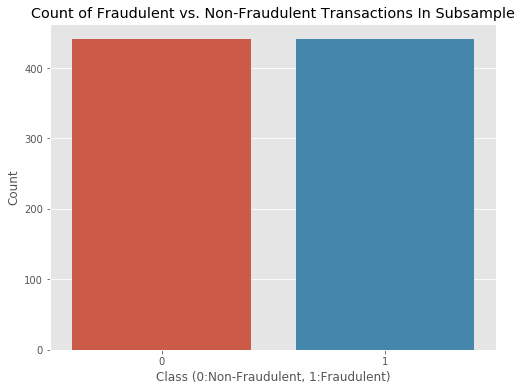

In [66]:
new_counts = subsample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [67]:
#taking a look at correlations once more
corr = balanced_df.corr()
corr = corr[['Class']]
corr

,Class
V1,-0.412
V2,0.460
V3,-0.560
V4,0.694
V5,-0.362
V6,-0.387
V7,-0.470
V8,0.049
V9,-0.553
V10,-0.627


In [68]:
#negative correlations smaller than -0.5
corr[corr.Class < -0.5]

,Class
V3,-0.560
V9,-0.553
V10,-0.627
V12,-0.674
V14,-0.743
V16,-0.581
V17,-0.548


In [69]:
#positive correlations greater than 0.5
corr[corr.Class > 0.5]

,Class
V4,0.694
V11,0.674
Class,1.000


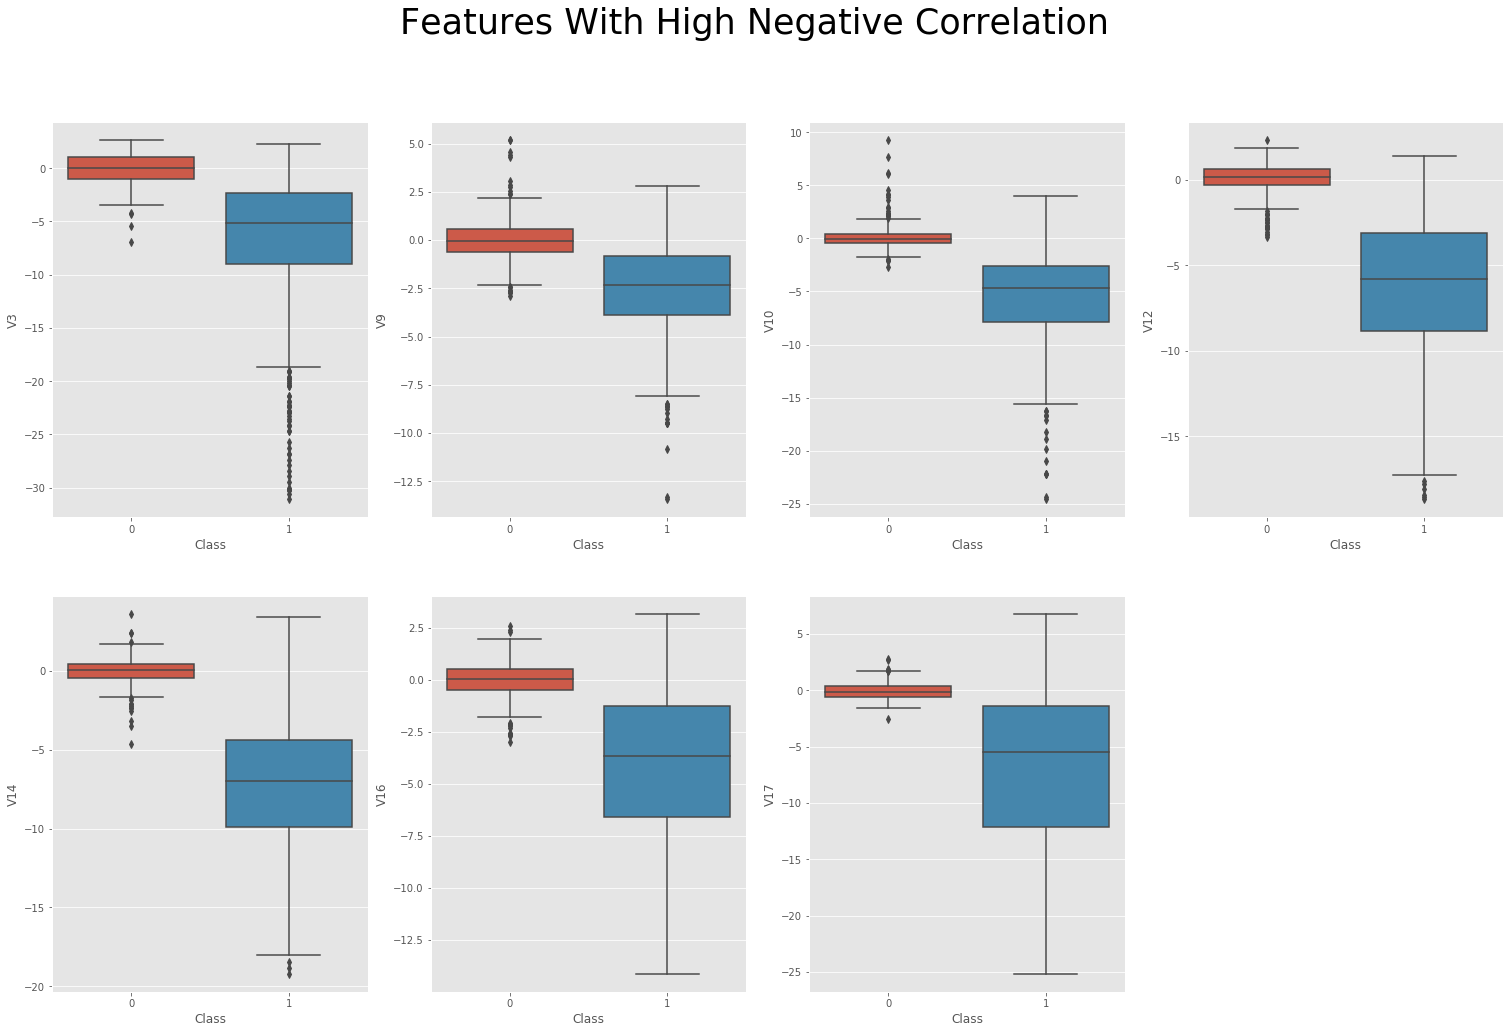

In [70]:
#visualizing the features w high negative correlation
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=subsample, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=subsample, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=subsample, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=subsample, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=subsample, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=subsample, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=subsample, ax=axes[1,2])
f.delaxes(axes[1,3])

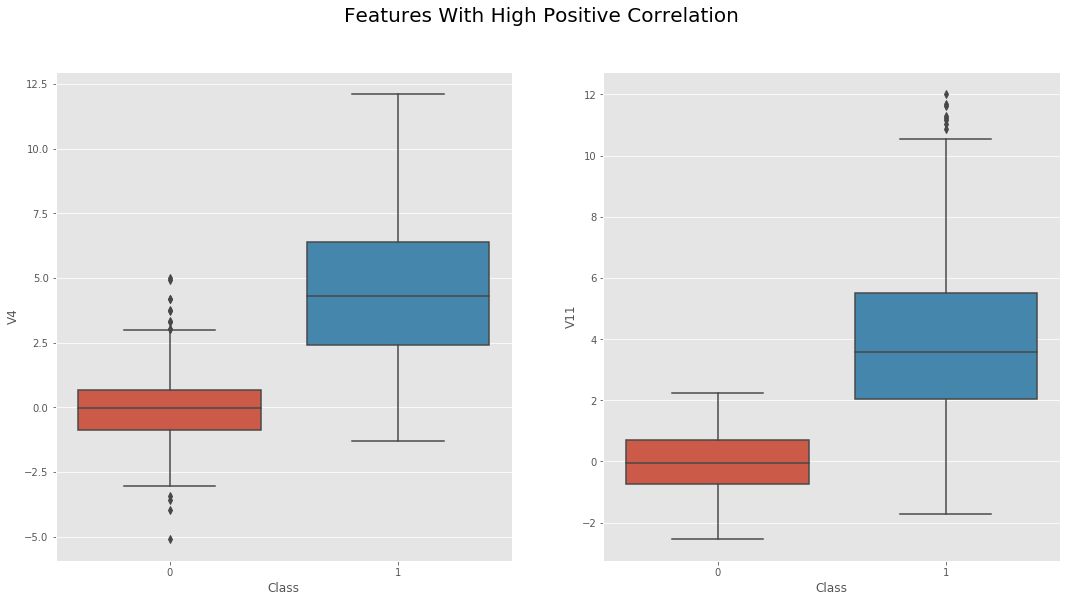

In [71]:
#visualizing the features w high positive correlation
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,9))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=subsample, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=subsample, ax=axes[1])

**Extreme Outlier Removal**

In [72]:
#Only removing extreme outliers
Q1 = balanced_df.quantile(0.25)
Q3 = balanced_df.quantile(0.75)
IQR = Q3 - Q1

df2 = balanced_df[~((balanced_df < (Q1 - 2.5 * IQR)) |(balanced_df > (Q3 + 2.5 * IQR))).any(axis=1)]

In [73]:
len_after = len(df2)
len_before = len(subsample)
len_difference = len(subsample) - len(df2)
print('We reduced our data size from {} transactions by {} transactions to {} transactions.'.format(len_before, len_difference, len_after))

We reduced our data size from 882 transactions by 249 transactions to 633 transactions.


<HR>

#### Dimensionality Reduction

<HR>

In [74]:
from sklearn.manifold import TSNE

X = df2.drop('Class', axis=1)
y = df2['Class']

In [75]:
#t-SNE
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

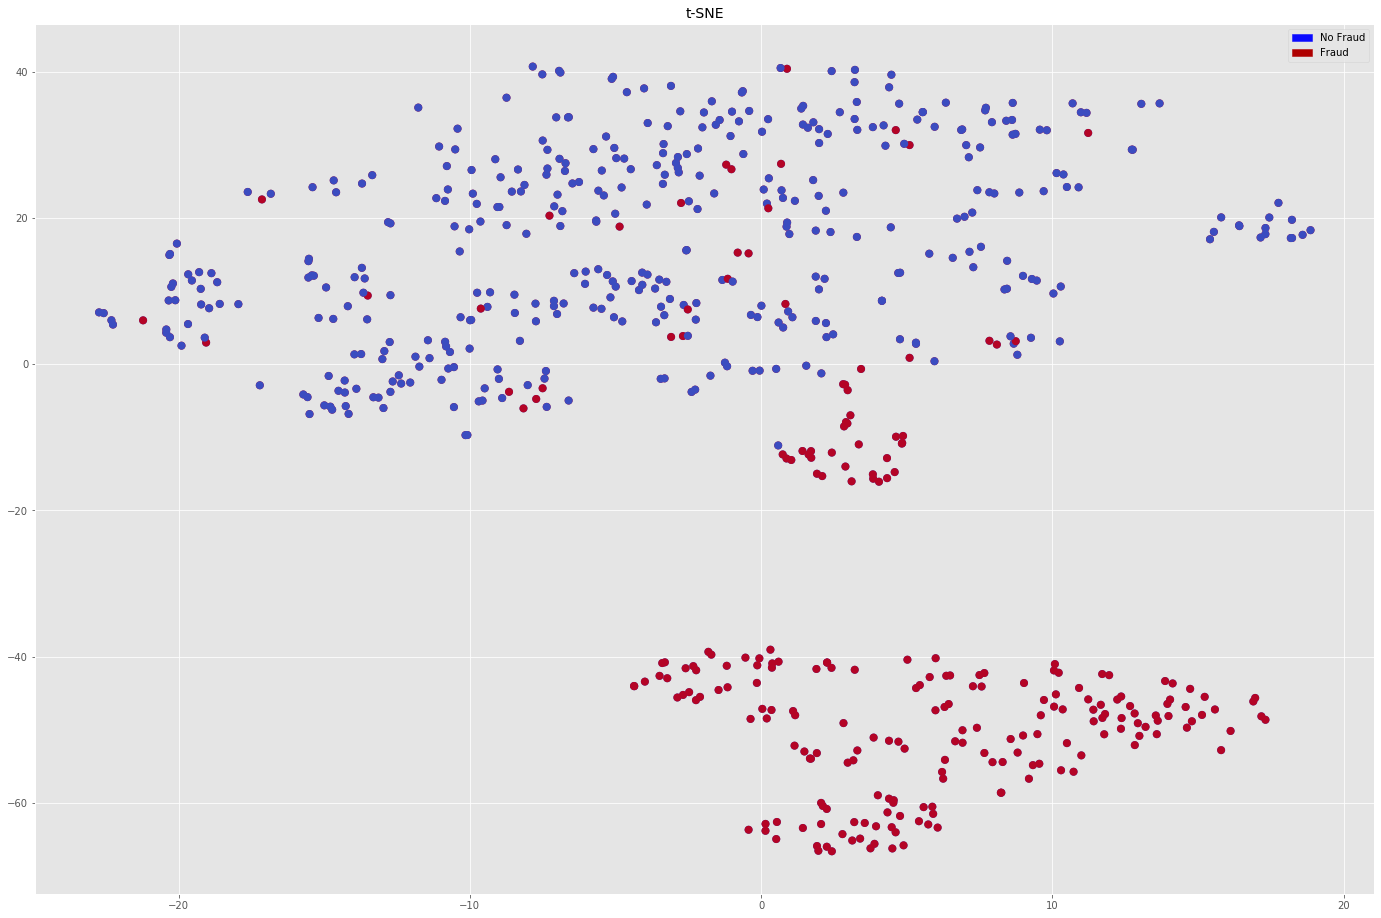

In [76]:
# t-SNE scatter plot
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(24,16))


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])
